In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
#StreetEasy Property Prices
df = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [19]:
#drop irrelevant columns
df = df.drop(columns = ['rental_id','neighborhood','borough'])
#neighborhood and borough might be relevant to analysis, but working with only the numerical values is just as good in this case
df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


In [20]:
#create dep and ind variables
x = df.drop(columns = ['rent'])
y = df['rent']

In [21]:
#split into training and testing
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=5)

In [48]:
#create model
mlr = LinearRegression()
mlr.fit(train_x,train_y)
rent_pred = mlr.predict(test_x)

In [49]:
#coefficients to the b+mᵢxᵢ
mlr.coef_

array([-356.20480431, 1084.48404958,    5.09383377,  -22.15307213,
         22.66025935,   -7.5811879 ,  -95.29302541,  -22.88047214,
        173.90254964, -193.71629476,   47.74965695,   97.71370616,
       -151.4942572 ,   23.94044732])

Text(0.5, 1.0, 'Apt Prices Manhattan')

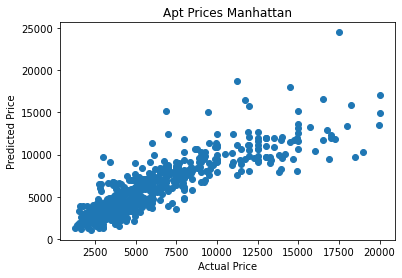

In [33]:
plt.scatter(test_y, rent_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Apt Prices Manhattan")

In [35]:
print(mlr.score(train_x,train_y))
print(mlr.score(test_x,test_y))
#SCORE is mean squared error regression loss (R^2)
#.78 is not too bad

0.7799390578434541
0.7749851059459625


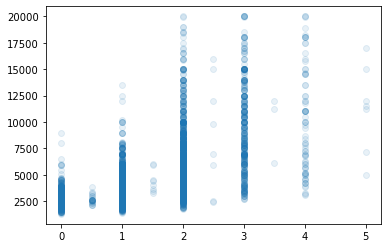

In [43]:
#Try to find variables that correlative with prices
plt.scatter(df[['bedrooms']], df[['rent']], alpha=0.1)
#might be a correlation - hard to tell because of the number of points

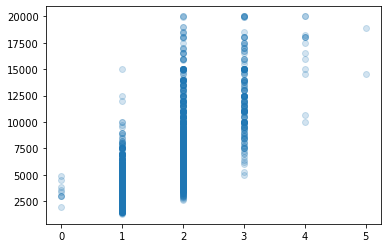

In [44]:
plt.scatter(df[['bathrooms']], df[['rent']], alpha=0.2)
#seems correlative

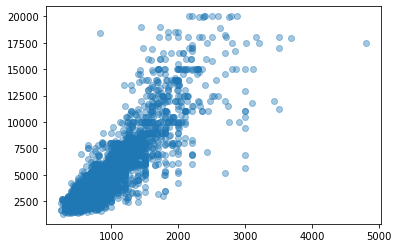

In [29]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)

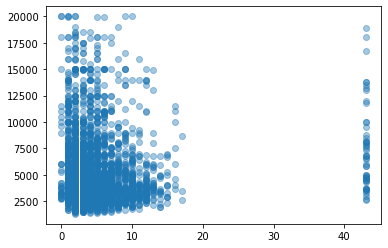

In [30]:
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
#does not seem to have a strong correlation
#might remove from model

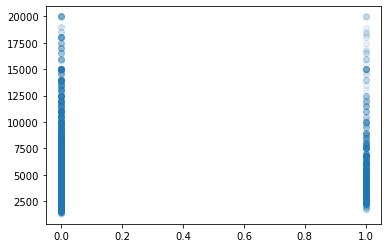

In [45]:
plt.scatter(df[['has_gym']], df[['rent']], alpha=0.1)
#negative correlation? hard to tell sometimes with discrete values

After looking at the graphs, you can seem that some of the independent variables do not have an expected effect.
For example, looking at the graph of 'has gym' vs 'rent', would having a gym decrease property value? Or do more 
expensive properties just not have gyms?